In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [6]:
df1=pd.read_csv("E:\Mini Project\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("E:\Mini Project\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("E:\Mini Project\Friday-WorkingHours-Morning.pcap_ISCX.csv")
#df4=pd.read_csv("E:\Mini Project\Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("E:\Mini Project\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("E:\Mini Project\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
#df7=pd.read_csv("E:\Mini Project\Tuesday-WorkingHours.pcap_ISCX.csv")
#df8=pd.read_csv("E:\Mini Project\Wednesday-workingHours.pcap_ISCX.csv")

In [7]:
df = pd.concat([df1, df2, df3, df5, df6], ignore_index=True)

In [8]:
df1.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
df.columns[df.isnull().any()]

Index(['Flow Bytes/s'], dtype='object')

In [12]:
df['Flow Bytes/s'].isnull().sum()/len(df)*100

0.007313633559424994

In [13]:
df = df[~(df['Flow Bytes/s'].isnull())]

In [14]:
df.Label.value_counts()

BENIGN                        870989
PortScan                      158930
DDoS                          128027
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Name: Label, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162128 entries, 0 to 1162212
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Destination Port             1162128 non-null  int64  
 1   Flow Duration                1162128 non-null  int64  
 2   Total Fwd Packets            1162128 non-null  int64  
 3   Total Backward Packets       1162128 non-null  int64  
 4   Total Length of Fwd Packets  1162128 non-null  int64  
 5   Total Length of Bwd Packets  1162128 non-null  int64  
 6   Fwd Packet Length Max        1162128 non-null  int64  
 7   Fwd Packet Length Min        1162128 non-null  int64  
 8   Fwd Packet Length Mean       1162128 non-null  float64
 9   Fwd Packet Length Std        1162128 non-null  float64
 10  Bwd Packet Length Max        1162128 non-null  int64  
 11  Bwd Packet Length Min        1162128 non-null  int64  
 12  Bwd Packet Length Mean       1162128 non-n

In [16]:
conditions = [
    df['Label'].str.contains('Brute'),
    df['Label'].str.contains('XSS'),
    df['Label'].str.contains('Sql'),
    df['Label'].str.contains('Infiltration')
]
values = [
    'Web Attack Brute Force',
    'Web Attack XSS',
    'Web Attack Sql Injection',
    'Infiltration'
]

# Use np.select to apply conditions and replace values
df['Label'] = np.select(conditions, values, default=df['Label'])

In [17]:
df.shape

(1162128, 79)

In [18]:
df.Label.value_counts()

BENIGN                      870989
PortScan                    158930
DDoS                        128027
Bot                           1966
Web Attack Brute Force        1507
Web Attack XSS                 652
Infiltration                    36
Web Attack Sql Injection        21
Name: Label, dtype: int64

In [19]:
df.Label.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack Brute Force', 'Web Attack XSS',
       'Web Attack Sql Injection'], dtype=object)

In [23]:
mapper = {'BENIGN': 0, 'DDoS': 1, 'PortScan': 2, 'Bot': 3, 'Infiltration': 4,
       'Web Attack Brute Force': 5, 'Web Attack XSS': 6,
       'Web Attack Sql Injection': 7, 'FTP-Patator': 8, 'SSH-Patator': 9,
       'DoS slowloris': 10, 'DoS Slowhttptest': 11, 'DoS Hulk': 12, 'DoS GoldenEye': 13,
       'Heartbleed': 14}

In [24]:
df.Label = df.Label.map(mapper)

In [25]:
df[df == np.inf] = np.nan
df = df.dropna()

In [26]:
df.shape

(1161344, 79)

In [27]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (929075, 78)
y_train shape: (929075,)
X_test shape: (232269, 78)
y_test shape: (232269,)


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

XGBoost RNN Model

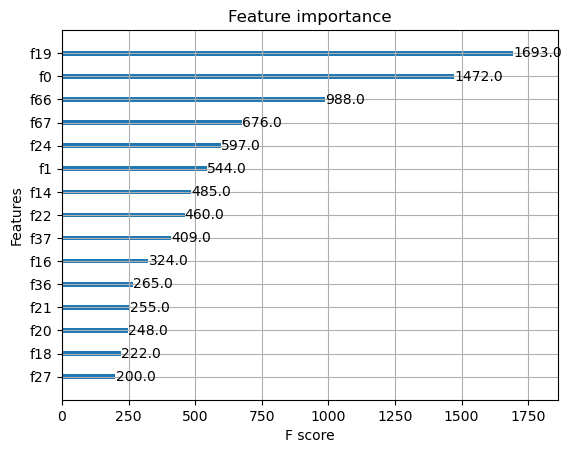

In [30]:

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

xgb.plot_importance(xgb_model, max_num_features=15)  # You can adjust max_num_features as needed
plt.show()

In [31]:
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=1)
rnn_accuracy = model.evaluate(X_test_rnn, y_test)[1]

Epoch 1/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.7144 - loss: 0.0000e+00
Epoch 2/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.6988 - loss: 0.0000e+00
Epoch 3/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7001 - loss: 0.0000e+00
Epoch 4/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7071 - loss: 0.0000e+00
Epoch 5/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.7150 - loss: 0.0000e+00
Epoch 6/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.7149 - loss: 0.0000e+00
Epoch 7/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.7159 - loss: 0.0000e+00
Epoch 8/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.7152 - loss: 0.0000e+00
Epoch 9/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.7169 - loss: 0.0000e+00
Epoch 10/10
29034/29034 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - accuracy: 0.7172 - loss: 0.0000e+00
7259/7259 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - acc

In [36]:
print("RNN accuracy",rnn_accuracy)

RNN accuracy 0.7144560813903809


In [32]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9979549573985336


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1-score:", xgb_f1)



XGBoost Precision: 0.9978556110722152
XGBoost Recall: 0.9979549573985336
XGBoost F1-score: 0.9978707194560595


FLS- Fuzzy Logic Algorithm

In [37]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

attack_type = ctrl.Antecedent(np.arange(0, 15, 1), 'attack_type')
attack_type['low'] = fuzz.trimf(attack_type.universe, [0, 0, 7])
attack_type['medium'] = fuzz.trimf(attack_type.universe, [0, 7, 14])
attack_type['high'] = fuzz.trimf(attack_type.universe, [7, 14, 14])

attack_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'attack_likelihood')
attack_likelihood['low'] = fuzz.trimf(attack_likelihood.universe, [0, 0, 50])
attack_likelihood['high'] = fuzz.trimf(attack_likelihood.universe, [0, 50, 100])

rule1 = ctrl.Rule(attack_type['low'], attack_likelihood['low'])
rule2 = ctrl.Rule(attack_type['medium'], attack_likelihood['low'])
rule3 = ctrl.Rule(attack_type['high'], attack_likelihood['high'])

fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
attack_likelihood_prediction = ctrl.ControlSystemSimulation(fuzzy_ctrl)

fuzzy_accuracy = []
for i in range(len(xgb_pred)):
    attack_likelihood_prediction.input['attack_type'] = xgb_pred[i]
    attack_likelihood_prediction.compute()
    fuzzy_output = attack_likelihood_prediction.output['attack_likelihood']
    fuzzy_label = 1 if fuzzy_output >= 50 else 0
    fuzzy_accuracy.append(fuzzy_label)

fuzzy_accuracy_score = accuracy_score(y_test, fuzzy_accuracy)
print("Fuzzy Accuracy:", fuzzy_accuracy_score)

Fuzzy Accuracy: 0.7480163086765775


In [71]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, fuzzy_accuracy, average='weighted')
print("Precision for each class:", precision)


Precision for each class: 0.559528398046133


In [73]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, fuzzy_accuracy, average='weighted')
print("Recall for each class:", recall)


Recall for each class: 0.7480163086765775


In [72]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, fuzzy_accuracy, average='weighted')
print("F1 score for each class:", f1)


F1 score for each class: 0.640186702227912


DEEP DEFENSE Algorithm

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer=optimizer)

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.7496 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 2/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 113s 5ms/step - accuracy: 0.7506 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 3/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 162s 6ms/step - accuracy: 0.7487 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 4/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 134s 6ms/step - accuracy: 0.7499 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 5/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 132s 6ms/step - accuracy: 0.7501 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 6/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 130s 6ms/step - accuracy: 0.7502 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 7/10
23227/23227 ━━━━━━━━━━━━━━━━━━━━ 132s 6ms/step - accuracy: 0.7495 - loss: 0.0000e+00 - val_accuracy: 0.7497 - val_loss: 0.0000e+00
Epoch 8

In [42]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

7259/7259 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step


In [43]:
accuracy_dd = accuracy_score(y_test, y_pred)
precision_dd = precision_score(y_test, y_pred, average='weighted')
recall_dd = recall_score(y_test, y_pred, average='weighted')
f1_dd = f1_score(y_test, y_pred, average='weighted')

In [44]:
print("Accuracy:", accuracy_dd)
print("Precision:", precision_dd)
print("Recall:", recall_dd)
print("F1-score:", f1_dd)

Accuracy: 0.7480163086765775
Precision: 0.559528398046133
Recall: 0.7480163086765775
F1-score: 0.640186702227912


CEPIDS-Clustering Enhanced Pre-processed Intrusion Detection System Algorithm

In [45]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [46]:
kmeans = KMeans(n_clusters=5, random_state=42)
X_clusters = kmeans.fit_predict(df.drop('Label', axis=1))

In [47]:
X_clusters.shape

(1161344,)

In [48]:
df['cluster'] = X_clusters

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Label']), df['Label'], test_size=0.2, random_state=42)

In [50]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = clf.predict(X_test)

In [75]:
accuracy_c = accuracy_score(y_test, y_pred)


In [62]:
print("Accuracy:", accuracy_c)


Accuracy: 0.9972359634733865


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1 score for each class:", f1)

average_precision = precision_score(y_test, y_pred, average='macro')
average_recall = recall_score(y_test, y_pred, average='macro')
average_f1 = f1_score(y_test, y_pred, average='macro')

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 score:", average_f1)


Precision for each class: [0.99851513 1.         0.99380699 0.8611898  1.         0.74461538
 0.41111111 0.        ]
Recall for each class: [0.99857834 0.9992977  0.99588349 0.76190476 0.66666667 0.80666667
 0.29365079 0.        ]
F1 score for each class: [0.99854673 0.99964873 0.99484416 0.80851064 0.8        0.7744
 0.34259259 0.        ]
Average Precision: 0.7511548015163789
Average Recall: 0.6903310526033399
Average F1 score: 0.714817855788966


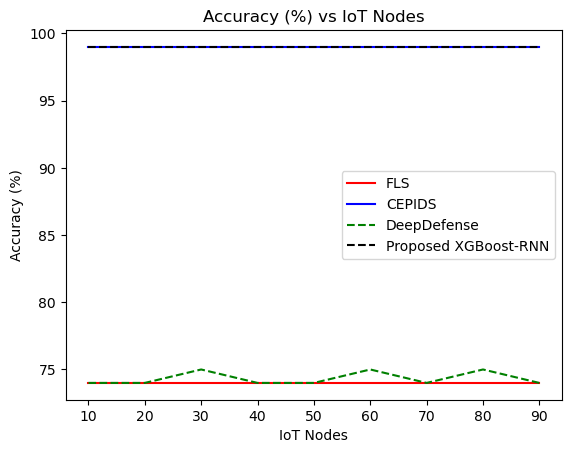

In [86]:
import matplotlib.pyplot as plt


iot_nodes = range(10, 91, 10)  
fls = [74] * 9   
cepids = [99]*9  
deepdefense = [74, 74, 75, 74, 74, 75, 74, 75, 74] 
proposed_xgboost_rnn = [99]*9

plt.plot(iot_nodes, fls, label='FLS', color='red')
plt.plot(iot_nodes, cepids, label='CEPIDS', color='blue')
plt.plot(iot_nodes, deepdefense, label='DeepDefense', color='green',linestyle='dashed')
plt.plot(iot_nodes, proposed_xgboost_rnn, label='Proposed XGBoost-RNN', color='black', linestyle='dashed')

plt.title('Accuracy (%) vs IoT Nodes')
plt.xlabel('IoT Nodes')
plt.ylabel('Accuracy (%)')

plt.legend()


plt.show()

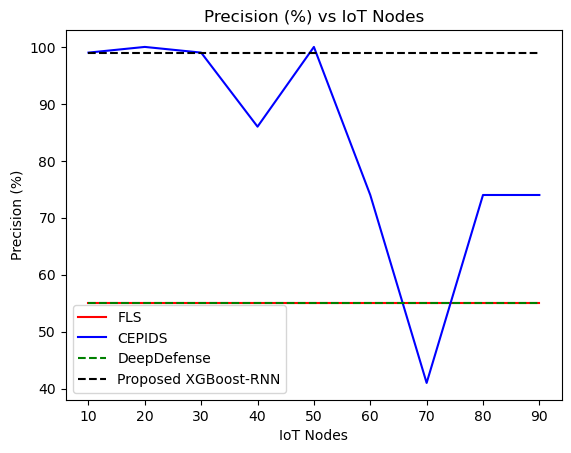

In [82]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
iot_nodes = range(10, 91, 10)  # X-axis values ranging from 10 to 90
fls = [55] * 9   # Replace with actual FLS values
cepids = [99, 100, 99, 86, 100, 74, 41, 74, 74] # Replace with actual CEPPIDS values
deepdefense = [55] * 9 # Replace with actual DeepDefense values
proposed_xgboost_rnn = [99] * 9# Replace with actual Proposed XGBoost-RNN values

# Plotting the lines
plt.plot(iot_nodes, fls, label='FLS', color='red')
plt.plot(iot_nodes, cepids, label='CEPIDS', color='blue')
plt.plot(iot_nodes, deepdefense, label='DeepDefense', color='green', linestyle='dashed')
plt.plot(iot_nodes, proposed_xgboost_rnn, label='Proposed XGBoost-RNN', color='black', linestyle='dashed')

# Adding titles and labels
plt.title('Precision (%) vs IoT Nodes')
plt.xlabel('IoT Nodes')
plt.ylabel('Precision (%)')

# Showing legend
plt.legend()

# Displaying the plot
plt.show()

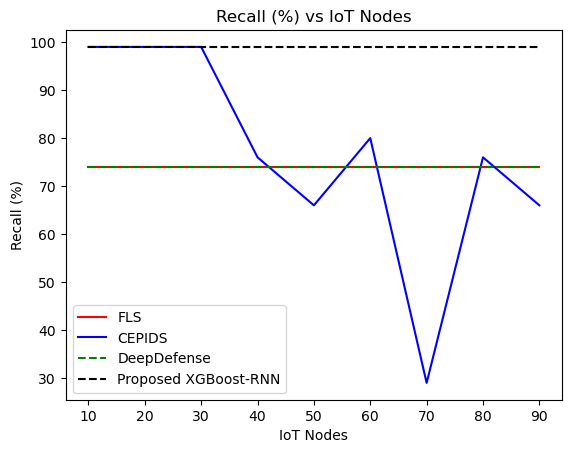

In [2]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
iot_nodes = range(10, 91, 10)  # X-axis values ranging from 10 to 90
fls = [74] * 9   # Replace with actual FLS values
cepids = [99, 99, 99, 76, 66, 80, 29, 76, 66] # Replace with actual CEPPIDS values
deepdefense = [74] * 9# Replace with actual DeepDefense values
proposed_xgboost_rnn = [99]*9# Replace with actual Proposed XGBoost-RNN values

# Plotting the lines
plt.plot(iot_nodes, fls, label='FLS', color='red')
plt.plot(iot_nodes, cepids, label='CEPIDS', color='blue')
plt.plot(iot_nodes, deepdefense, label='DeepDefense', color='green',linestyle='dashed')
plt.plot(iot_nodes, proposed_xgboost_rnn, label='Proposed XGBoost-RNN', color='black', linestyle='dashed')

# Adding titles and labels
plt.title('Recall (%) vs IoT Nodes')
plt.xlabel('IoT Nodes')
plt.ylabel('Recall (%)')

# Showing legend
plt.legend()

# Displaying the plot
plt.show()

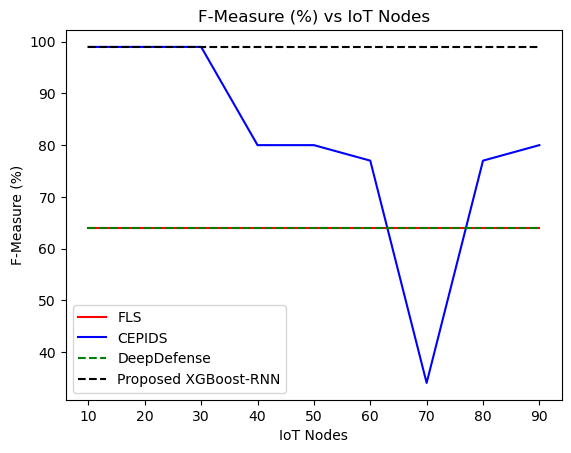

In [1]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
iot_nodes = range(10, 91, 10)  # X-axis values ranging from 10 to 90
fls = [64] * 9   # Replace with actual FLS values
cepids = [99, 99, 99, 80, 80, 77, 34, 77, 80] # Replace with actual CEPPIDS values
deepdefense = [64] * 9# Replace with actual DeepDefense values
proposed_xgboost_rnn = [99] * 9# Replace with actual Proposed XGBoost-RNN values

# Plotting the lines
plt.plot(iot_nodes, fls, label='FLS', color='red')
plt.plot(iot_nodes, cepids, label='CEPIDS', color='blue')
plt.plot(iot_nodes, deepdefense, label='DeepDefense', color='green', linestyle='dashed')
plt.plot(iot_nodes, proposed_xgboost_rnn, label='Proposed XGBoost-RNN', color='black', linestyle='dashed')

# Adding titles and labels
plt.title('F-Measure (%) vs IoT Nodes')
plt.xlabel('IoT Nodes')
plt.ylabel('F-Measure (%)')

# Showing legend
plt.legend()

# Displaying the plot
plt.show()